# Connect 4
Dieses Notebook beschäftigt sich dem Spiel `Connect 4`, welches im deutschen Sprachraum auch als `4 Gewinnt` bekannt ist. Ziel des Spiels ist es 4 Steine seiner eigenen Farbe in horizontaler, vertikaler oder diagonaler Richtung in einem Spielbrett zu Platzieren.
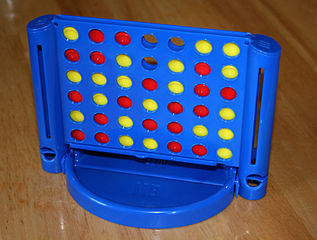

## Datensatz
Zu diesem Spiel wurde ein umfangreicher Datensatz erhoben. Der Zustand eines Spiels wurde festgehalten, während beide Spieler je 4 Steine platziert hatten. Zu dieser gespielten Partie wurde dann das Endergebnis aus Sicht des ersten Spielers, also Sieg, Niederlage bzw. Unentschieden vermerkt.

Quelle des Datzensatzen:
http://archive.ics.uci.edu/ml/datasets/Connect-4

### Eigenschaften und Aufbau
Das Spielbrett ist aufgebaut als Gitter und ist folgendermaßen unterteilt:
- **7 Felder horizontal**, beschriftet von **a bis g**
- **6 Felder vertikal**, beschriftet von **1 bis 6**
Das ergibt insgesamt 42 mögliche Steinpositionen. Zusammen mit Endergebnis enthält der Datensatz `43 Attribute`. Spieler Eins wird als **x** und Spieler 2 als **o** gekennzeichnet. **b** bedeutet das dort kein Stein liegt.

Der Datensatz ist wie folgt aufgebaut:

- 1. a1: {x,o,b} (x = Stein Spieler 1, o = Stein Spieler 2, b = Leeres Feld)
- 2. a2: {x,o,b}
- 3. a3: {x,o,b}
- 4. a4: {x,o,b}
- 5. ...
- 41. g5: {x,o,b}
- 42. g6: {x,o,b}
- 43. Class: {win,loss,draw} (Sieg Spieler 1, Niederlage Spieler 1, Unentschieden)

Der Datensatz beinhaltet insgesamt **67557** Einträge

## Zielstellung
Mit Hilfe von Maschine Learning Verfahren soll eine Möglichkeit geschaffen werden, den Ausgang des Spiel in dem 9. Zug vorhersagen zu können.
Da das Ziel aus 3 konkreten, voneinander getrennten Zuständen besteht, spricht man hier auch von einer Klassifikationsaufgabe.

***

## Lösungansätze
Wie so oft gibt es für ein Problem nicht nur eine Lösungsmöglichkeit. Obwohl häufig neuronale Netzwerke als überwachtes Lernverfahren der künstlichen Intelligenz bei Vorhersageproblemen verwendet werden, wird im Folgenden auch noch eine zweite Variante vorgestellt.


### Lösungsansatz I: Neural Network
Als ersten Ansatz wurde ein `Deep Learning`-Netzwerk eingesetzt. Die konkrete Ausprägung des Netzwerks basiert auf Erfahrungen aus Experimenten und der Weg zur abschließenden Lösung wird im Notebook erläutert. Für den Einsatz eines solchen Netzwerks wurden folgende Merkmale als entscheidend betrachtet.

<u>Vorteile:</u>
 - neuronale Netze sind hoch anpassbar an jede Art von Klassifikationsproblemen
 - Solche Netze bzw. deren Eingaben können effizient parallelisiert werden. Daher ist es auch schon mit TensorFlow möglich die GPU zu nutzen um die Trainings auszuführen
 
<u>Nachteile:</u>
 - Es ist viel Training und experiementieren bzw. Erfahrung notwendig um eine akzeptable Lösung zu finden 
 - Oft ist es schwer zu visualisieren/interpretieren wie Daten zusammenhängen oder vorher der Wissenserwerb des Netzwerks kommt
 
### Lösungsansatz II: Neural Network - Raster
Bei der Betrachtung des Ausgangsproblems kann man dieses auch als Raster betrachten. Das Spielfeld ist als Gitter aufgebaut, bei dem die Steinpositonen auf eine regelbasierte Weise zusammenhängen. Daher könnte eventuell auch ein Neuronales Netz eine Lösung liefern, dass eher für Rasterdaten verwendung findet wie es beispielsweise bei Bildern der Fall ist. 

### Lösungsansatz III: DecisionTrees
Während der Bearbeitung mit Neuronalen Netzwerken schien eine weitere - die der `DecisionTrees` als vielversprechende Alternative. Mit Hilfe der Lektüre `Maschinelles Lernen` vom Autor `Jörg Frochte` wurden die Möglichkeiten der Klassifizierung mit Hilfe von Binärbäumen analysiert und angewendet. Konkret wird der `DecisionTreeClassifier` sowie der `RandomForestClassifier` - von scikit-learn eingesetzt, 
Die Entscheidung für den Einsatz der Verfahren ergibt sich aus folgenden Überlegungen.

<u>Vorteile:</u>
 - Einfach zu verstehen und einzusetzen. Es wird kaum Vorarbeit benötigt
 - Im Gegensatz zu Neuronalen Netzen ist ein `DecisionTree`sehr schnell erstellt und einsatzbreit
 
<u>Nachteile:</u>
 - Im Gegensatz zu Neuronalen Netzen bestehen nur begrenzte Möglichkeiten der Verbesserung beim konkreten Problemen. Kann ein Problem nicht akzeptabel gelöst werden, dann kann auch kaum eine Verbesserung mit Hilfe von Parametern erzielt werden.

## Interpretation und Vergleich der Ergebnisse
Alle Ergebnisse werden gesammelt und beim jeweiligen Lösungsansatz interpretiert. Abgeschlossen wird dies durch einen Vergleich der 3 vorgestellten Lösungsansätze.
***

# Vorarbeiten
Für Lösungsansätze wird eine Reihe von Third-Party-Bibliotheken verwendet

In [ ]:
# Es kam zu Problemen mit der Tensoflow beim Lösungsansatz II bei Nutzung der Layer - Die genaue Ursache ist unbekannt, aber ein Downgrade zu 2.3.1 schaffte Abhilfe
#%pip install -U tensorflow==2.3.1

# Sollte dies wieder Erwarten nicht funktionieren dann auch die Abhängigkeiten mit downgraden
#%pip install -U tensorflow==2.3.1 --use-feature=2020-resolver

In [ ]:
# Import aller ThirdParty Bibliotheken 
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import collections
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

Die Bibliothek `Pandas` bietet eine Reihe von praktischen Hilfsfunktionen für die Arbeit mit Neuronalen Netzen bzw. deren Datensätzen. Da es eventuell auf der zu Grunde liegenden Jupyter Notebook Installation nicht zur Verfügung steht, wird es bei Bedarf installiert. 

In [ ]:
%pip install pandas
import pandas as pd

Die Daten des Connect-4 lassen sich einfach visualiseren. Für diese `Datenexploration` wurde eine eigene Klasse `Connect4` erstellt die diese Aufgabe übernimmt.

In [ ]:
from connect4 import Connect4
connect4_obj=Connect4("connect-4.data")
dataframe=connect4_obj.get_dataframe()
print("Der Datensatz besitzt folgende Dimensionen (Zeilen/Spalten)", dataframe.shape)

Um sich ein Bild von dem Zustand des Spiels zu machen in der eine Vorhersage getroffen werden soll, kann nun jede einzelne Zeile des Datensatzes visualisert werden.

In [ ]:
connect4_obj.visualize_row(row_number=8050)

## Data Preprocessing
Die Eingangsdaten müssen in numerische Werte umgewandelt, um mit diesen Rechnen zu können. Diese Umwandlung übernimmt ebenfalls die `Connect4` Bibliothek.

Danach wird der Datensatz noch aufgeteilt in:
- **Eingabevektoren** (Steinpositionen)
- **Zielvektoren** (Spielausgang)

Diese werden jeweils weiter aufteilt in:
- **Trainingsdaten**
- **Validierungsdaten**

die dann zum Trainieren der Neuronalen Netzwerke benutzt werden bzw. um die Trainierten Netze zu überprüfen. Wichtig hierbei ist, dass die Auswahl zufällig erfolgt, um ein `einseitiges` Lernen des neuronalen Netzwerkes zu vermeiden. Auch sollte die Menge an Trainingsdaten gegenüber den Validierungsdaten eine Balance finden, so dass ein `auswendig` lernen vermieden wird, bzw. eine `Generalisierung` noch möglich ist. Eine Wahl um die 20% Valdierungsdaten ist üblicherweise ein guter Ausgangspunkt.

In [ ]:
# Der Datensatz wurde bereits eingelesen und mit numerical_dataframe() kann eine numerische Repäsentation erzeugt werden.
dataset = connect4_obj.numerical_dataframe()

# Aufteilen in Eingabe- und Zielvektoren
inputData = dataset[:,0:42]
targetData = dataset[:,42]

# Erzeugen von Traings- und Validierungsdatensatz
TrainSet = np.random.choice(inputData.shape[0],int(inputData.shape[0]*0.80), replace=False)
ValSet = np.delete(np.arange(0, targetData.shape[0] ), TrainSet)
XVal = inputData[ValSet,:]
YVal = targetData[ValSet]
XTrainSet = inputData[TrainSet,:]
YTrainSet = targetData[TrainSet]

# Lösungansatz I - Neural Network
Für ein Neuronales Netzwerk gibt es unzählige Anpassungmöglichkeiten, jedoch sind durch das Ausgangsproblem ein paar Eckpunkte eine logische Konsequenz.
- Es gibt nur **3** Möglichkeiten wie das Spielausgehen kann, daher muss auch das Netzwerk nur **3 Endergebnisse** liefern können
- Das Spiel besitzt **6x7 Felder** mit je **3 Zuständen** -> Macht insgesamt 126 Eingabezustände. Das heißt es sollten mindestens **126 Neuronen** auf einer Netzwerkschicht sein um dies abbilden zu können. 

In [ ]:
# Die Erzeugung des Netzwerks wird als wiederverwendbare Funktion bereitgestellt
def NetworkModel(dense_connections):
    modelNN = tf.keras.Sequential()
    modelNN.add(tf.keras.layers.Dense(dense_connections, activation='relu'))
    modelNN.add(tf.keras.layers.Dense(dense_connections, activation='relu'))
    modelNN.add(tf.keras.layers.Dense(3, activation='softplus'))
    return modelNN

In [ ]:
# Alle Ergebnisse werden in einem Dictionary gespeichert
results = {}

# Netzwerkparameter
epochList = [20, 30, 40]
optimizerList = ["adam", "rmsprop", "SGD"]
connectionList = [100, 200, 300]

# Alle Netzwerk-Konfigurationen durchrechnen lassen
for connections in connectionList:
    for optimizer in optimizerList:
        for epochs in epochList:
            modelNN = NetworkModel(connections)
            # Laut Doku sollte SparseCategoricalCrossentropy mit from_logits sich gut eignen für zwei oder mehr Integer Eingabeklassen
            loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
            # gesammelt werden Daten zur Verlustfunktion und zur Genauigkeit
            modelNN.compile(loss=loss_fn, optimizer=optimizer, metrics=['accuracy'])
            # Das Netz wird nun anhand der Testdaten trainiert 
            history = modelNN.fit(XTrainSet, YTrainSet, epochs=epochs)
            # Das trainierte Netz wird nun anhand der Validierungdaten überprüft
            val_loss, val_accuracy = modelNN.evaluate(XVal, YVal, verbose=2)
            # Alle relevanten Ergebnisse/Parameter des Netzes werden gespeichert
            result = {
                "connections": connections,
                "optimizer": optimizer,
                "epochs": epochs,
                "history": history,
                "val_accuracy": val_accuracy,
                "val_loss": val_loss
            }
            # Für eine leichtere Auswertung wird die accuracy als Key verwendet
            results[val_accuracy] = result

Die gesammelten Ergebnisse werden nun nach besten validierten Genauigkeit sortiert.

In [ ]:
oderedDict = collections.OrderedDict(sorted(results.items(), reverse=True))

# Top3 Netzwerke
modellNN_1 = list(oderedDict.values())[0]
modellNN_2 = list(oderedDict.values())[1]
modellNN_3 = list(oderedDict.values())[2]

Die Verläufe des `Lernens` der drei besten Netzwerke werden zunächst einmal visualisiert.

In [ ]:
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(12)

ax.set_title('Leistung der Top3 Netzwerke',fontsize=16)
ax.set_xlabel('Epochs',fontsize=14)
ax.set_ylabel('Prozent Genauigkeit',fontsize=14)

ax.plot(np.arange(1, modellNN_1.get("epochs")+1, 1), modellNN_1.get("history").history['accuracy'], 'k--', label='Genauigkeit', color='green', marker='o' ,linewidth=2, markersize=6)
ax.plot(np.arange(1, modellNN_1.get("epochs")+1, 1), modellNN_1.get("history").history['loss'], 'k:', label='Verlust', color='green', marker='o' ,linewidth=2, markersize=6)

ax.plot(np.arange(1, modellNN_2.get("epochs")+1, 1), modellNN_2.get("history").history['accuracy'], 'k--', label='Genauigkeit', color='yellow', marker='o' ,linewidth=2, markersize=6)
ax.plot(np.arange(1, modellNN_2.get("epochs")+1, 1), modellNN_2.get("history").history['loss'], 'k:', label='Verlust', color='yellow', marker='o' ,linewidth=2, markersize=6)

ax.plot(np.arange(1, modellNN_3.get("epochs")+1, 1), modellNN_3.get("history").history['accuracy'], 'k--', label='Genauigkei', color='red', marker='o' ,linewidth=2, markersize=6)
ax.plot(np.arange(1, modellNN_3.get("epochs")+1, 1), modellNN_3.get("history").history['loss'], 'k:', label='Verlust', color='red', marker='o' ,linewidth=2, markersize=6)

legend = ax.legend(loc='lower left', shadow=True, fontsize='medium')
# background color on the legend
legend.get_frame().set_facecolor('C9')
plt.show()

Alle gesammelten Ergebnissen werden noch mal tabellarisch aufgelistet, sortiert nach dem besten Ergebnis.

In [ ]:
column_labels = ['Verbindungen', 'Optimizer', 'Epochen', 'Letzte trainierte Genauigkeit', 'Validierte Genauigkeit', 'Diff. Genauigkeit Training/Validierung']
cell_data = []
for dictionary in oderedDict.values():
        allValues = list(dictionary.values())
        cell_data.append([allValues[0], # Verbindungen
                        allValues[1], # Optimizer
                        allValues[2], # Epochen
                        "{:.3f}".format(allValues[3].history.get("accuracy")[-1]), # Letzte trainierte Genauigkeit, gerundet auf 3 Kommastellen
                        "{:.3f}".format(allValues[4]), # Validierte Genauigkeit, gerundet auf 3 Kommastellen
                        "{:.3f}".format(allValues[3].history.get("accuracy")[-1] - allValues[4]) # Diff. Genauigkeit Training/Validierung, gerundet auf 3 Kommastellen
                       ])

# Using pandas du show a beautified table
table = pd.DataFrame(cell_data, columns=column_labels)
table

## Interpretation der I. Ergebnisse
Es erstellte Netzwerk wurde mit einer Reihe von unterschiedlichen Konfigurationen durchlaufen. Dabei lässt sich feststellen, dass bereits nach kurzer Zeit eine richtige Vorhersagewahrscheinlichkeit des Spielausgangs von über **80%** erreicht werden kann.

Für das konkrete Problem scheint der Optimizer **Adam** eine gute Wahl zu sein, da dieser sehr gehäuft auf den vorderen Plätzen vertreten ist.

Bei den Verbindungen zwischen den Netzwerkschichten sind **100 zu wenig**, da diese Netzwerke weniger gute Ergebnisse lieferten.

Bei der Differenz zwischen trainierter und validierter Genauigkeit fällt auf, das bereits alle Netzwerke über dem Valdierungswert trainiert wurden (positive Differenz). Das könnte auf ein sogenanntes **Overfitting** hindeuten obwohl sie laut dem Liniendiagramm wohl weiter in richtung 100% Konvergieren würden bei längerem Training. Die größte Abweichung liegt schon bei über 10%. Das ist erheblich und es scheint als wenn weniger Epochen auch weniger Differenz bedeuten. Aber hier müsste man eine genauere Experiemtierreihe starten welche nur die Trainingslängen miteinandere vergleicht. 

Sofern man weitere Experimente durchführen wollte, würde man diese Erkenntnisse nun nutzen können um die Variablen der Netzwerke weiter einzuschränken oder auszutauschen - z.b könnten die Optimizer `SGD` und `rmsprop` ersetzt werden `Ftrl` oder `Adamax`, etc.

# Lösungansatz II - Neural Network - Raster
Im zweiten Lösungsansatz wird nun versucht das Problem als Raster zu verstehen. Damit ändert sich auch die Form der Eingabevektoren für ein Neuronales Netzwerk. Es wird nun eine Matrix aufgepannt von **6 x 7 x 3** zu jedem Datensatz. Dies ergibt sich aus der Überlegung 6 x 7 Felder zu 3 Feldzuständen.


## Data Preprocessing
Der Datensatz muss nun in eine Matrix transformiert werden.

In [ ]:
# hot encoding tranformations on Dataframe
np_dataframe=connect4_obj.get_dataframe().to_numpy()
only_input_entries=np_dataframe[:,:-1]
temp=[]
for i in range(only_input_entries.shape[0]):    
    s = pd.Series(np_dataframe[i,:-1])
    # die in Zahlen umgewandelten Eingaben in eine Matrix transformieren und speichern
    temp.append(pd.get_dummies(s).to_numpy().reshape(6,7,3))    
X = np.asarray(temp)
print("Die Eingabemtrix X wurde erstellt und besitzt nun die Form: " + str(X.shape))

Der Ausgabevektor ist identisch mit dem ersten Lösungsansatz wird jedoch folgend mit `y` weitergeführt um die Variablen nicht mit vorherigen Ansätzen zu vermischen.

In [ ]:
# shallow copy is enough due we have only a 1d-IntArray
y = targetData.copy()

Die Aufteilung von Tranings- und Validerungsdaten von Ein- und Ausgabevektoren erfolgt dieses mal mit der Hilfsfunktion `train_test_split` aus der Bibliothek `pandas`. Es übernimmt auch gleichzeitig die zufällige Auswahl an Daten sowie Größe der Aufteilung.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

Es ist auch Möglich sich die Trainings- und Testdaten noch einmal zu visualiseren

In [ ]:
def func(pct):
    return "{:.1f}%\n[{:d}]".format(pct, int((pct * dataframe.shape[0])/100))

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Training', 'Test'
sizes = [X_train.shape[0],  X_test.shape[0]]
explode = (0, 0.06)  # only "explode" the 2nd slice (i.e. 'Test')

fig1, ax1 = plt.subplots(figsize=(8, 6))
patches, texts, autotexts = ax1.pie(sizes, explode=explode, labels=labels, autopct=lambda pct: func(pct), shadow=True, startangle=90)

for i in range(len(texts)):
    texts[i].set_fontsize("xx-large")
    autotexts[i].set_fontsize("xx-large")
    autotexts[i].set_color("white")
    autotexts[i].set_fontweight("bold")


ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Größe des Trainings- und Test-Sets", fontsize=14)
plt.show()

## Struktur des Netzwerks
Der Aufbau des Netzwerks benötigt Layer sie sich für eine Gitterstruktur eignen. Daher kommen hier beispielsweise 2D Convolutional und 2D Pooling Layer zum Einsatz welche gewöhnlich für Bildanalysen zum Einsatz kommen. 

In [ ]:
# Network für Rastermatrix
def Network4Raster(input_shape , dense_connections , output_shape):
    model = tf.keras.models.Sequential([ 
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Flatten(), # needed to convert the input shape for dense layers
  tf.keras.layers.Dense(dense_connections, activation='relu'),
  tf.keras.layers.Dense(output_shape,activation='softmax')])
    return model

In [ ]:
# Darstellung eines Beispielschemas für das Netzwerk
modelNNRaster = Network4Raster(input_shape=X.shape[1:] , dense_connections=1000 , output_shape=3)
modelNNRaster.summary()

In [ ]:
# Alle Ergebnisse werden in einem Dictionary gespeichert
resultsNNRaster = []

# Netzwerkparameter
optimizerList = ["adam", "rmsprop", "SGD"]
connectionList = [500, 1000, 2000]
epochs = 40

# Alle Netzwerk-Konfigurationen durchrechnen lassen
for connections in connectionList:
    for optimizer in optimizerList:
            modelNNRaster = Network4Raster(input_shape=X.shape[1:] , dense_connections=connections , output_shape=3)
            # Laut Doku sollte SparseCategoricalCrossentropy mit from_logits sich gut eignen für zwei oder mehr Integer Eingabeklassen
            loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
            # gesammelt werden Daten zur Verlustfunktion und zur Genauigkeit
            modelNNRaster.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])
            # Das Netz wird nun anhand der Testdaten trainiert 
            historyANNRaster = modelNNRaster.fit(X_train, y_train, epochs=epochs)
            # Das trainierte Netz wird nun anhand der Validierungdaten überprüft
            test_lossNNRaster, test_accuracyNNRaster = modelNNRaster.evaluate(X_test, y_test, verbose=2)
            # Alle relevanten Ergebnisse/Parameter des Netzes werden gespeichert
            result = {
                "epochs" : epochs,
                "connections": connections,
                "optimizer": optimizer,
                "history": historyANNRaster,
                "test_lossNNRaster": test_lossNNRaster,
                "test_accuracyNNRaster": test_accuracyNNRaster
            }
            # Alle Ergebnisse werden in einer Liste gespeichert
            resultsNNRaster.append(result)

In [ ]:
# Sorierung der Ergebnisse nach der Genauigkeit
oderedDictNNRaster = sorted(resultsNNRaster, key=lambda k: k['test_accuracyNNRaster'], reverse=True)

# Top3 Netzwerke
modellNNRaster_1 = oderedDictNNRaster[0]
modellNNRaster_2 = oderedDictNNRaster[1]
modellNNRaster_3 = oderedDictNNRaster[2]


# Visualisierung der Ergebnisse
Die 3 besten Ergebnisse werden in einem Liniendiagramm dargestellt.

In [ ]:
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(12)

ax.set_title('Leistung der Top3 Netzwerke -  Raster',fontsize=16)
ax.set_xlabel('Epochs',fontsize=14)
ax.set_ylabel('Percentage Accuracy',fontsize=14)

ax.plot(np.arange(1, modellNNRaster_1.get("epochs")+1, 1), modellNNRaster_1.get("history").history['accuracy'], 'k--', label='Genauigkeit', color='green', marker='o' ,linewidth=2, markersize=6)
ax.plot(np.arange(1, modellNNRaster_1.get("epochs")+1, 1), modellNNRaster_1.get("history").history['loss'], 'k:', label='Verlust', color='green', marker='o' ,linewidth=2, markersize=6)

ax.plot(np.arange(1, modellNNRaster_2.get("epochs")+1, 1), modellNNRaster_2.get("history").history['accuracy'], 'k--', label='Genauigkeit', color='yellow', marker='o' ,linewidth=2, markersize=6)
ax.plot(np.arange(1, modellNNRaster_2.get("epochs")+1, 1), modellNNRaster_2.get("history").history['loss'], 'k:', label='Verlust', color='yellow', marker='o' ,linewidth=2, markersize=6)

ax.plot(np.arange(1, modellNNRaster_3.get("epochs")+1, 1), modellNNRaster_3.get("history").history['accuracy'], 'k--', label='Genauigkeit', color='red', marker='o' ,linewidth=2, markersize=6)
ax.plot(np.arange(1, modellNNRaster_3.get("epochs")+1, 1), modellNNRaster_3.get("history").history['loss'], 'k:', label='Verlust', color='red', marker='o' ,linewidth=2, markersize=6)

legend = ax.legend(loc='lower left', shadow=True, fontsize='medium')
# background color on the legend
legend.get_frame().set_facecolor('C9')
plt.show()

Darstellung des besten Ergebnisses als Kreisdiagramm

In [ ]:
def func1(pct):
    return "{:.1f}%\n[{:d}]".format(pct, int((pct * X_test.shape[0])/100))

fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))

recipe = ["falsch klassifiziert", "richtig klassifiziert"]

bestAccuracy = modellNNRaster_1.get("test_accuracyNNRaster")

data = [(1-bestAccuracy) * X_test.shape[0] ,bestAccuracy *  X_test.shape[0]]
explode = (0.02, 0.02) 
wedges, texts,autotexts = ax.pie(data, explode=explode, wedgeprops=dict(width=0.5), startangle=-40 
                                 , autopct=lambda pct: func1(pct), pctdistance=0.75, labeldistance=1.0)
autotexts[0].set_fontsize("large")
autotexts[1].set_fontsize("large")
autotexts[0].set_color("white")
autotexts[1].set_color("white")
autotexts[0].set_fontweight("bold")
autotexts[1].set_fontweight("bold")

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Prozentsatz der Fälle, die vom Netzwerk korrekt klassifiziert wurden", fontsize=14)
ax.legend(wedges, ["falsch klassifiziert" , "richtig klassifiziert"],
          title="Gesamttestfälle : "+str( X_test.shape[0]),
          loc="center left",
          bbox_to_anchor=(1, 0.1, 1, 1),
          fontsize=14)

plt.show()

Tabellarische Übersicht aller Ergebnisse

In [ ]:
column_labels = ['Epochen', 'Verbindungen', 'Optimizer', 'Letzte trainierte Genauigkeit', 'Validierte Genauigkeit', 'Diff. Genauigkeit Training/Validierung']
cell_data = []
for dictionary in oderedDictNNRaster:
        allValues = list(dictionary.values())
        cell_data.append([allValues[0], # Epochen
                        allValues[1], # Verbindungen
                        allValues[2], # Optimizer
                        "{:.3f}".format(allValues[3].history.get("accuracy")[-1]), # Letzte trainierte Genauigkeit, gerundet auf 3 Kommastellen
                        "{:.3f}".format(allValues[4]), # Validierte Genauigkeit, gerundet auf 3 Kommastellen
                        "{:.3f}".format(allValues[3].history.get("accuracy")[-1] - allValues[4]) # Diff. Genauigkeit Training/Validierung, gerundet auf 3 Kommastellen
                       ])

# Using pandas du show a beautified table
table = pd.DataFrame(cell_data, columns=column_labels)
table

## Interpretation der II. Ergebnisse
Bei dem zweiten Lösungsansatz fällt nun sofort auf, dass einige Durchläufe eine **identische Genauigkeit** liefern. Das liegt jedoch nicht daran, dass diese gleichwertig sind, sondern daran, dass diese Netzwerke überhaupt **keinen Lernfortschritt** gezeigt haben. Ihre Performance war über die gesamte Trainigsdauer konstant. Dies kann als Fehlschlag eines solchen Netzwerks bzw. ihrer Konfiguration angesehen werden.

Die übrigen Netzwerke bieten eine validierte Performance von stets unter 80% mit einer relativ großen Abweichung gegenüber dem Trainingswerten.

Die Parameter **Optimizern, Dense Connections**, etc. scheinen auch nur einen **sehr geringen Effekt** auf das Gesamtnetzwerk zu haben. Die tatsächlichen erzielten Ergebnisse unterscheiden um weniger als 1%. An dieser Stelle könnte ein Konstruktionsproblem der Netzwerklayer vorliegen welcher sichtbaren Fortschritt verhindert.

Für weitere Experimente sollte die Gesamtkonstruktion der Layer verändert werden. Hier würde eine klare Empfehlung folgen zur Vertiefung in die Arbeit mit bildverarbeitender Layer. Die übrigen Parameter sollten dagegen in ihrer Variabilität eingeschränkt oder gänzlich auf eine feste Konfiguration festgehalten werden. 

# Lösungsansatz III: DecisionTrees
Der dritte Lösungsansatz beschäftigt sich nun mit den`Entscheidungsbäumen`. Hierfür können wir die bereits erstellten Trainings - und Validierungsdaten aus dem ersten Ansatz Wiederverwenden.

#### Aufbau des DecisionTreeClassifier und Errechnung der Genauigkeit der Vorhersage
In diesem Bereich der Implementation wird der Baum mit den Trainingsdaten aufgebaut und mit weiteren Optionen konfiguriert.
Die hier angewendete Konfiguration "max_leaf_nodes" schränkt die maximale Anzahl an Blattknoten des Binärenbaumes ein. Dadurch konnte eine Genauigkeitssteigerung von bis zu 2% erreicht werden. 
Die Genauigkeit der Vorhersage ergibt sich aus dem Vergleich zwischen der Vorhersage und den Validierungsdaten.

In [ ]:
dtclf = tree.DecisionTreeClassifier(max_leaf_nodes = 2590)
dtclf = dtclf.fit(XTrainSet, YTrainSet)

# Ergebnismatrix mit nur einer Zeile
dtclfResults = dtclf.predict(XVal)

# Vergleich mit Targetwerten
comparison = 0;
i = 0;
while i < dtclfResults.size:
    if dtclfResults[i] == YVal[i]:
        comparison += 1;
        i+=1
    elif dtclfResults[i] != YVal[i]:
        i+=1
dtclfAccuracy = (comparison/YVal.size)*100

print("Die Vorhersagegenauigkeit des DecisionTreeClassifier beträgt: " + str(dtclfAccuracy) + "%")

#### Visualisierung des DecisionTreeClassifier Binärbaumes
Für die Visualisierung wird eine neuere Version der Bibliothek scikit-learn benötigt. Daher wird an dieser Stelle sichergestellt dass diese auch Verfügbar ist.

In [ ]:
%pip install scikit-learn --upgrade

In [ ]:
plt.figure(figsize=(40,12))  # set plot size (denoted in inches)
tree.plot_tree(dtclf,max_depth=3, fontsize=14)
plt.show()

#### Aufbau des RandomForestClassifier und Errechnung der Genauigkeit der Vorhersage
Der `RandomForestClassifier` Binärbaum benötigt mehr Zeit aus der DecisionTreeClassifier für den Aufbau. Dieser wird hier in der Standardkonfiguration verwendet um am konkreten Problem zu messen wie hoch die Genauigkeit solcher Bäume bereits sind ohne weitere Optimierungen.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier(random_state=0)
rfclf = rfclf.fit(XTrainSet, YTrainSet)

# Ergebnismatrix mit nur einer Zeile
rfclfResults = rfclf.predict(XVal)
##Vergleich mit Targetwerten
comparison = 0;
i = 0;
while i < rfclfResults.size:
    if rfclfResults[i] == YVal[i]:
        comparison += 1;
        i+=1
    elif rfclfResults[i] != YVal[i]:
        i+=1
rfclfAccuracy = (comparison/YVal.size)*100

print("Die Vorhersagegenauigkeit des RandomForestClassifier beträgt: " + str(rfclfAccuracy) + "%")

# Vergleich der Lösungsansätze
Alle 3 Lösungsansätze zeigten, dass es möglich ist mit Lernverfahren des `Maschine Learning` Vorhersagen über zukünftige Ereignisse zu treffen. Den Ausgang eines `4 Gewinnt` Spiels vorherzusagen mit einer Wahrscheinlichkeit von ~82% kann wohl als akzeptabel bezeichnet werden, welches dennoch Verbesserungspotentiale hat.

Interessanterweise lieferte der erste Ansatz mit dem `Deep Neuronal Network` sowie der des `RandomForestClassifier` nahezu identische Ergebnisse. Solche Neuronalen Netze gelten in der Literatur allgemein den `DecisionTrees` als überlegen, daher liegt hier die Vermutung nahe, dass noch lange nicht das optimalste Netzwerk erstellt und trainiert wurde. Dennoch sei bemerkt dass die Erstellung und Nutzung des `RandomForestClassifier` schnell und einfach erfolgte und trotzdem ein akzeptables Ergebnis liefern konnte. Wahrscheinlich ist dies den identischen Eingabevektoren geschuldet da hier 42 lediglich 3 gleichartige Zustände existieren.

# Arbeitsaufteilung
Andreas Voigt (Mat.Nr.: 19398):
- Beschreibung des Ausgansdatensatzes
- Review und Verbesserungen der ersten und zweiten Netzwerklösung
- Erstellung von Visualisierungen und Ergebnisinterpretationen

Ricardo Lissner (Mat.Nr.: 19134):
- Erstellung, Dokumentation und Bearbeitung des DecisionTreeClassifier
- Erstellung des ersten Neuronalen Netzwerks
- Review aller Dokumentationen und Ergebnissen

Rituraj Singh (Mat.Nr.: 19539):
- Erstellung, Dokumentation und Bearbeitung des RandomForestClassifier
- Erstellung des zweiten Neuronalen Netzwerks für Rastereingaben
- Review und Verbesserungen an Visualisierungen